In [1]:
# General Libraries
import numpy as np
from tdmclient import ClientAsync
import time
import matplotlib.pyplot as plt

# Custom libraries 
import filtering
import local_navigation as ln

client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node 95b5d775-2dea-417c-9b71-d572afe275af

In [2]:
#MAIN CODE : 

THRESHOLD_OBST = 3500 
command_motor = [101, 100]
command_motor_rotate = [-101, 100]
speed_history = []
angular_speed_history = []
norm_distance = []
angle = []
local_obstacle = False

async def main():

    global local_obstacle
    start_time = time.time()
    state_estimation = np.array([[0], [0], [0], [0], [0]])
    P_estimation = 1000 * np.ones(5)
    bool_camera = False
    camera_position = np.array([[0], [0], [0]]) # get_camera_position()

    while(1):
        node = await client.wait_for_node()
        sens = await ln.get_proximity_values(node)

        if (sum(sens[i] > THRESHOLD_OBST for i in range(0, 5)) > 0): local_obstacle = True

        if(local_obstacle):
            node.send_set_variables(ln.motors(0,0))
            break

        if not local_obstacle: 
            node.send_set_variables(ln.motors(command_motor[0], command_motor[1]))
            #node.send_set_variables(ln.motors(command_motor_rotate[0], command_motor_rotate[1]))
            state_estimation, P_estimation, speed, angular_speed, start_time = await filtering.get_position(state_estimation, P_estimation, start_time, bool_camera, camera_position, node)
            speed_history.append(speed)
            angular_speed_history.append(angular_speed)
            norm_distance.append(np.sqrt(state_estimation[0]**2 + state_estimation[1]**2))
            #print("distance", norm_distance[-1], "state_estimate angle", state_estimation[2]*180/np.pi, end="\r")
            angle.append((state_estimation[2]*180)/np.pi)

        if (norm_distance[-1] > 300):
            node.send_set_variables(ln.motors(0,0))
            break
        # if state_estimation[2] > 2*np.pi:
        #     node.send_set_variables(ln.motors(0,0))
        #     break

await main()

previous_state_estimation angle [0]
predicted_state_estimation angle [0.]
new state_estimation angle [0.]
previous_state_estimation angle [0.]
predicted_state_estimation angle [0.]
new state_estimation angle [0.]
previous_state_estimation angle [0.]
predicted_state_estimation angle [0.]
new state_estimation angle [0.]
previous_state_estimation angle [0.]
predicted_state_estimation angle [0.]
new state_estimation angle [0.]
previous_state_estimation angle [0.]
predicted_state_estimation angle [0.]
new state_estimation angle [0.]
previous_state_estimation angle [0.]
predicted_state_estimation angle [0.]
new state_estimation angle [0.]
previous_state_estimation angle [0.]
predicted_state_estimation angle [0.]
new state_estimation angle [0.]
previous_state_estimation angle [0.]
predicted_state_estimation angle [0.]
new state_estimation angle [0.52229261]
previous_state_estimation angle [0.52229261]
predicted_state_estimation angle [0.52229509]
new state_estimation angle [0.87786605]
previo

In [1]:
await node.set_variables(ln.motors(0, 0))

NameError: name 'node' is not defined

The speed variance in mm^2/s^2 is 0.9626153847275106
The angular speed variance in rad^2/s^2 is 0.033574038999966055
316


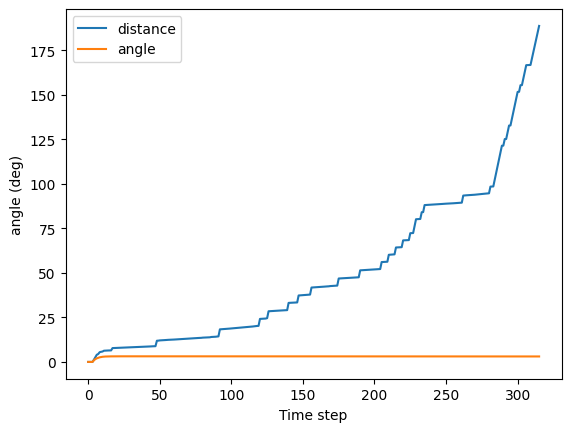

In [3]:
std_speed = np.std(speed_history[10:])
std_angular_speed = np.std(angular_speed_history[10:])
print("The speed variance in mm^2/s^2 is {}".format(std_speed))
print("The angular speed variance in rad^2/s^2 is {}".format(std_angular_speed))
print(len(speed_history))

plt.plot(norm_distance[:], label="distance")
plt.xlabel("Time step")
plt.ylabel("distance (mm)")
plt.legend()

plt.plot(angle[:], label="angle")
plt.xlabel("Time step")
plt.ylabel("angle (deg)")
plt.legend()

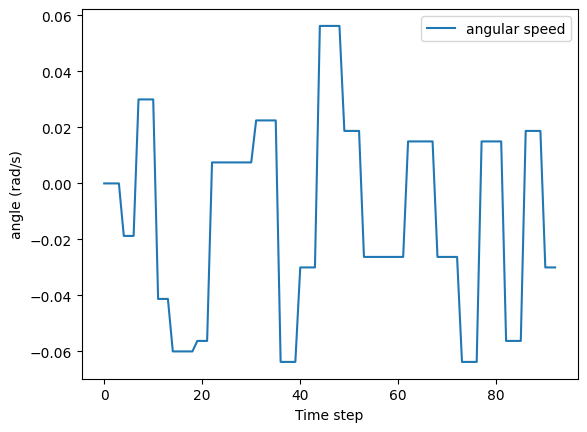

In [5]:
plt.plot(angular_speed_history[:], label="angular speed")
plt.xlabel("Time step")
plt.ylabel("angle (rad/s)")
plt.legend()